## **Import Needed Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import  classification_report , accuracy_score , confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **EDA**

In [2]:
df = pd.read_csv("/kaggle/input/drug-classification/drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
# shape of dataframe
df.shape

(200, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
df.duplicated().sum()

0

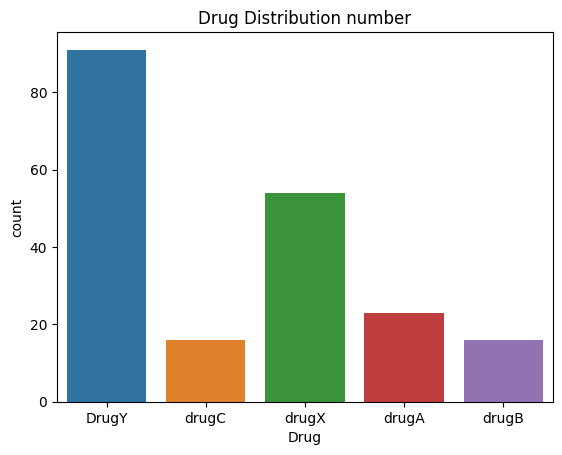

In [7]:
sns.countplot(x=df['Drug'])
plt.title('Drug Distribution number');

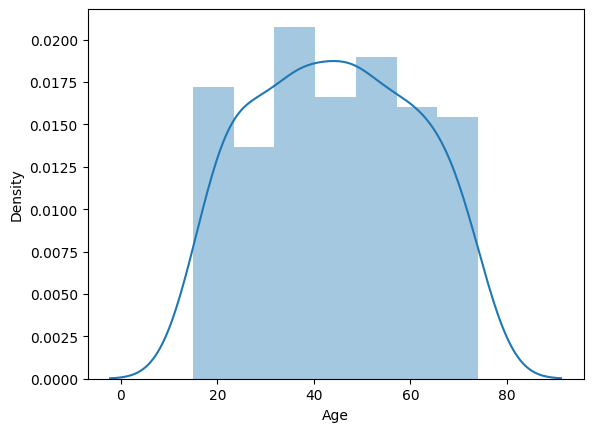

In [8]:
sns.distplot(df['Age']);

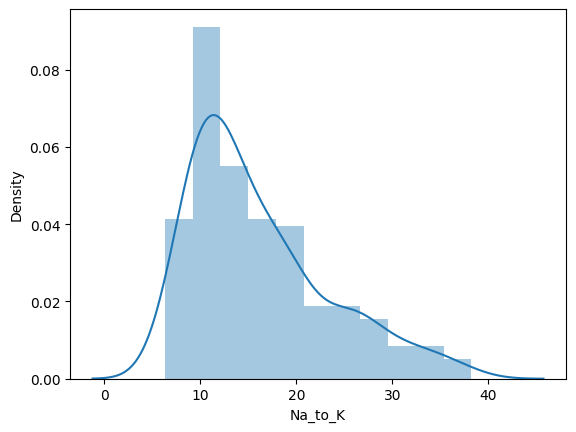

In [9]:
sns.distplot(df['Na_to_K']);

In [10]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

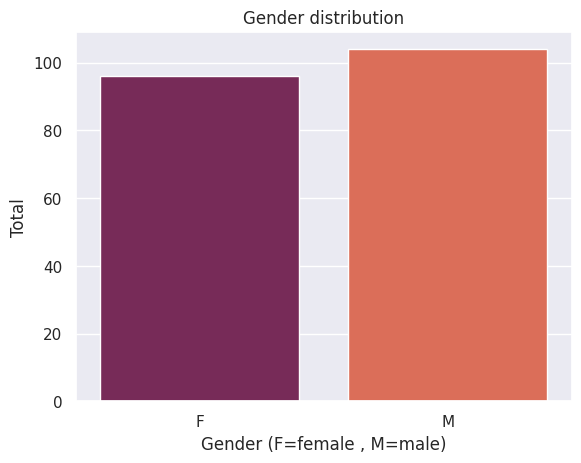

In [11]:
sns.set_theme(style="darkgrid")
sns.countplot(data=df ,x= df['Sex'] , palette='rocket')
plt.xlabel('Gender (F=female , M=male)')
plt.ylabel('Total')
plt.title('Gender distribution');

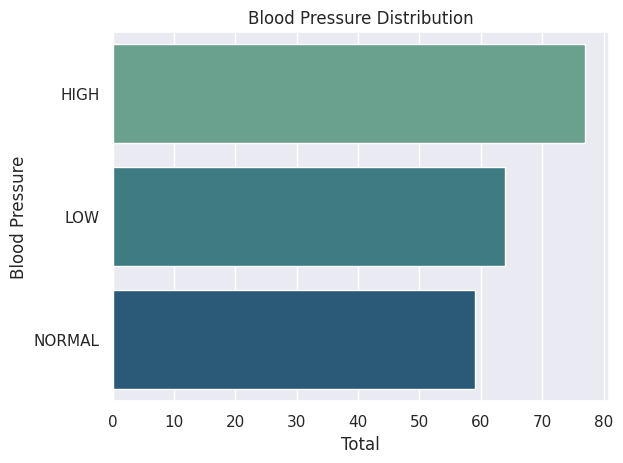

In [12]:
sns.countplot(y=df['BP'], data=df , palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.title('Blood Pressure Distribution');

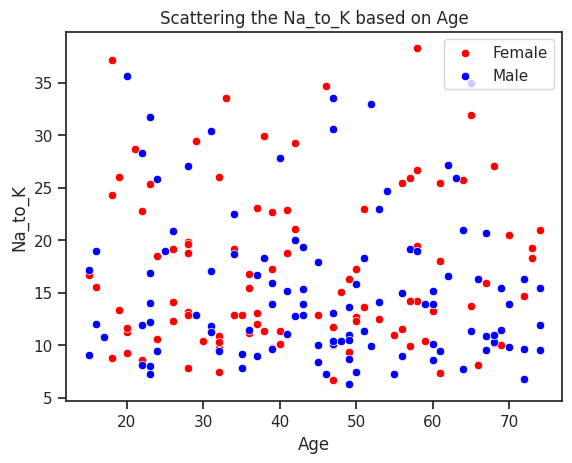

In [13]:
sns.set_theme(style="ticks")
sns.scatterplot(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Red" , )
sns.scatterplot(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Blue")
plt.title('Scattering the Na_to_K based on Age')
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K");
plt.grid(visible=False)

## **Preprocessing**

### Define features (X) and target (y)

In [14]:
X = df.drop('Drug' , axis='columns')
y = df['Drug']

In [15]:
X = pd.get_dummies(X)

### Splitting

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , shuffle= True , random_state=42)

## **Machine Learning Models**

### **1. Logistic Regression**

In [17]:
lr_model = LogisticRegression(max_iter=1500)
lr_model.fit(X_train , y_train)

LogisticRegression(max_iter=1500)

In [18]:
lr_model.score(X_train , y_train)

0.99375

In [19]:
lr_pred = lr_model.predict(X_test)

In [20]:
accuracy_score(y_test , lr_pred)

1.0

In [21]:
print(classification_report(y_test , lr_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



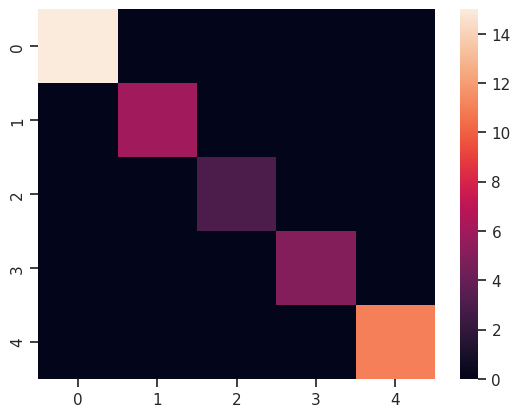

In [22]:
sns.heatmap(confusion_matrix(y_test , lr_pred));

### **2. Random Forest**

In [23]:
RF_model = RandomForestClassifier(n_estimators= 200)
RF_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=200)

In [24]:
RF_model.score(X_train , y_train)

1.0

In [25]:
RF_pred = RF_model.predict(X_test)

In [26]:
accuracy_score(y_test , RF_pred)

1.0

In [27]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



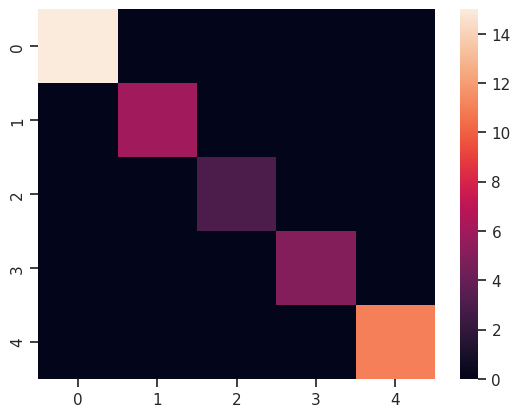

In [28]:
sns.heatmap(confusion_matrix(y_test , RF_pred));

## **Highest Influencing Features**

In [29]:
features = X_test.columns
importance_f = lr_model.coef_[0]

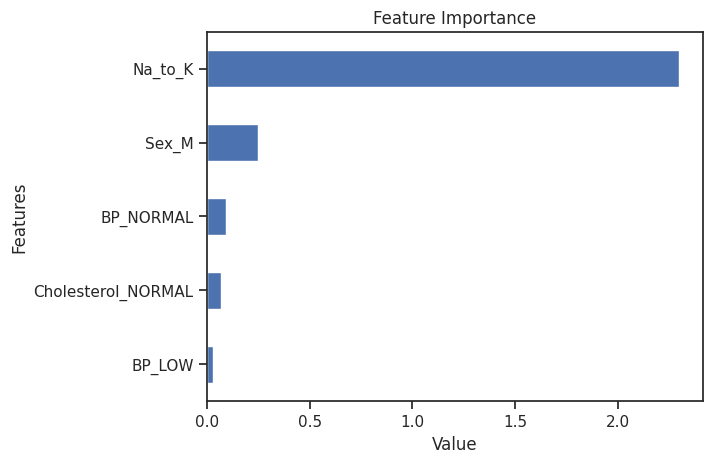

In [30]:
feat_imp = pd.Series(importance_f , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Value")
plt.ylabel("Features")
plt.title("Feature Importance");

## **Conclusion**

#### At last i used 2 models logitic regression model and random forest model both got 100% accuracy in both training and testing